# Relatório - Trabalho Integrador do Primeiro Trimestre do Programa Avançado em Data Science e Decisão


In [ ]:
!pip install ipython-autotime

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
alt.data_transformers.disable_max_rows()
pd.set_option('mode.chained_assignment', None)
from pandas_profiling import ProfileReport
%load_ext autotime
import sklearn
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import numpy as np
sns.set_palette('Accent')
sns.set_style('darkgrid')

time: 165 ms (started: 2021-06-26 12:03:57 +00:00)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 31.2 s (started: 2021-06-26 12:04:00 +00:00)


In [5]:
cd drive/MyDrive/insper

/content/drive/MyDrive/insper
time: 11.5 ms (started: 2021-06-26 12:04:31 +00:00)


In [ ]:
ls

'BD_PRE (2).csv'   data-treated.csv
time: 125 ms (started: 2021-06-23 23:41:44 +00:00)


Lendo o nosso conjunto de dados

In [59]:
df = pd.read_csv('./BD_PRE.csv', encoding='latin-1', low_memory=False)

time: 968 ms (started: 2021-06-26 12:19:18 +00:00)


Visualizando o shape dos nossos dados

In [7]:
df.shape

(166699, 56)

time: 4.6 ms (started: 2021-06-26 12:04:34 +00:00)


Descrição das Variáveis

Variáveis de identificação

IDTNS: Código Identificador do pesquisado.

Tipo: Tipo de serviço pesquisado.

Operadora: Operadora responsável pelo serviço prestado ao entrevistado.

Estado: Estado onde reside o entrevistado.

Data: Data da realização da entrevista.

Ano Base: Ano de referência para realização das entrevistas.

In [9]:
df.columns

Index(['IDTNS', 'TIPO', 'OPERADORA', 'ESTADO', 'DATA', 'ANO_BASE', 'Q1', 'Q2',
       'Q2_1', 'Q2_2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q8a', 'Q9', 'J1',
       'B1_1', 'B1_2', 'C1_1', 'C1_2', 'D1', 'D2_1', 'D2_2', 'D2_3', 'E1_1',
       'E1_2', 'E1_3', 'A1_1', 'A1_2', 'A1_3', 'A1_4', 'A2_1', 'A2_2', 'A2_3',
       'A3', 'A4', 'A5', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'G1', 'H0',
       'COD_IBGE', 'H1', 'H2', 'H2a', 'H3', 'I1', 'I2', 'PESO'],
      dtype='object')

time: 7.68 ms (started: 2021-06-26 12:04:41 +00:00)


Iremos separar as colunas de acordo com o grupo de cada uma das variáveis

In [8]:
identification = ['IDTNS', 'TIPO', 'OPERADORA', 'ESTADO', 'DATA', 'ANO_BASE']
research_scope_filter = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q8a']
gender = ['Q9']
general_satisfaction = ['J1']
offer_and_contract = ['B1_1', 'B1_2']
voice_operation = ['C1_1', 'C1_2']
data_operation = ['D1', 'D2_1', 'D2_2', 'D2_3']
recharge = ['E1_1', 'E1_2', 'E1_3']
attendance_channels = ['A1_1', 'A1_2', 'A1_3', 'A1_4']
phone_attendance = ['A2_1', 'A2_2', 'A2_3']
phone_attendance_score = ['A3']
internet_attendance_score = ['A4']
store_attendance_score = ['A5']
resolution_effectiveness = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6']
competition = ['G1']
social_demographic_profile = ['H0', 'H1', 'H2', 'H2a', 'H3', 'I1', 'I2', 'PESO']

time: 8.87 ms (started: 2021-06-26 12:04:40 +00:00)


Começaremos conhecendo sobre a população da pesquisa realizada

> Qual o genêro mais representativo em nossa população?

In [10]:
gender_map = {1: 'Feminino', 2: 'Masculino'}

df_gender = pd.DataFrame(df[gender].value_counts().reset_index())
df_gender.columns = ['Sexo', 'Total']
df_gender['Sexo'] = df_gender['Sexo'].map({1: 'Feminino', 2: 'Masculino'})
df_gender

Sexo  Total
0   Feminino  83835
1  Masculino  82864

time: 25.8 ms (started: 2021-06-26 12:04:43 +00:00)


In [11]:
bars = alt.Chart(df_gender).mark_bar().encode(
    x='Total:Q',
    y='Sexo:O',
    color='Sexo',
    tooltip=['Total', 'Sexo'],
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Total:Q'
)

(bars + text).properties(width=500, height=300)

alt.LayerChart(...)

time: 63.2 ms (started: 2021-06-26 12:04:46 +00:00)


In [12]:
gender_total_dif = int(abs(df_gender['Total'].diff())[1])
gender_total_dif

971

time: 4.91 ms (started: 2021-06-26 12:04:50 +00:00)


In [13]:
print(f"O público feminino contém {gender_total_dif} pessoas a mais do que o masculino")

O público feminino contém 971 pessoas a mais do que o masculino
time: 797 µs (started: 2021-06-26 12:04:50 +00:00)


* Qual a idade do nosso público?

In [14]:
age_mapper = {
    1: 'Menor de 16',
    2: 'De 16 a 17 anos',
    3: 'De 18 a 24 anos',
    4: 'De 25 a 30 anos',
    5: '31 a 35 anos',
    6: '36 a 40 anos',
    7: '41 a 50 anos',
    8: '51 anos a 70 anos',
    9: 'Mais de 70 anos',
    99: 'Recusa'
}

df_age = df['Q8a'].value_counts().reset_index()
df_age.columns = ['Idade', 'Total']
df_age['Idade'] = df_age['Idade'].map(age_mapper)
df_age

Idade  Total
0    De 25 a 30 anos  32343
1       41 a 50 anos  31721
2    De 18 a 24 anos  29016
3       31 a 35 anos  24799
4  51 anos a 70 anos  23972
5       36 a 40 anos  23281
6    Mais de 70 anos   1567

time: 24.3 ms (started: 2021-06-26 12:04:52 +00:00)


In [16]:
df_gender_age = df[[*gender, 'Q8a']]
df_gender_age.columns = ['Sexo', 'Idade']
df_gender_age['Idade'] = df_gender_age['Idade'].map(age_mapper)
df_gender_age['Sexo'] = df_gender_age['Sexo'].map(gender_map)

bars = alt.Chart(df_gender_age).mark_bar().encode(
    x='count(Idade):Q',
    y='Idade:O',
    color='Sexo:N',
    tooltip=[
        'Sexo', 
        'Idade', 
         alt.Tooltip('count(Idade)', title='Total de pessoas'),
        ]
).configure_axisY(
labelAngle=0,
    titleAngle=0,
    titlePadding=30,
    titleFontSize=13,
    labelFontSize=11,
    titleAlign='center',
    labelAlign='right'
)

bars.encoding.x.title = 'Total de pessoas'

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('count(Idade):Q', size=50),
)

bars

alt.Chart(...)

time: 1.13 s (started: 2021-06-26 12:05:23 +00:00)


In [ ]:
len(list(filter(lambda x: x > 0.10, df.corr()['J1'].sort_values(ascending=False))))

23

time: 1.51 s (started: 2021-06-23 23:43:00 +00:00)


## Preenchendo valores nulos e corrigindo valores inseridos

> Para o preenchimento dos valores, iremos assumir e tratar valores faltantes de todas as nossas variáveis independentes como uma classe de problema *Missing Completely at Random*.

### Preenchendo os valores relativos ao atendimento da operadora

> Preenchendo o valor respectivo a não utilização do serviço de atendimento telefônico da prestadora nos seis meses anteriores à pesquisa

In [60]:
df['A1_1'] = df['A1_1'].fillna(0)

time: 7 ms (started: 2021-06-26 12:20:22 +00:00)


> Preenchendo o valor respectivo a não utilização do atendimento pela internet da prestadora nos seis meses anteriores à pesquisa

In [61]:
df['A1_2'] = df['A1_2'].fillna(0).replace(2, 1)

time: 7.11 ms (started: 2021-06-26 12:20:23 +00:00)


> Preenchendo o valor respectivo a nota atribuída ao tempo de espera para falar com o atendente, para os casos em que as pessoas não realizaram contato com a prestadora

In [62]:
a2_1_mean =  df[df['A2_1'] != 99]['A2_1'].mean()
df['A2_1'] = df['A2_1'].replace(99, a2_1_mean).fillna(a2_1_mean)

time: 47.9 ms (started: 2021-06-26 12:20:23 +00:00)


> Preenchendo o valor respectivo a nota atribuída à necessidade de repetir a demanda, para os casos em que as pessoas não realizaram contato com a prestadora

In [63]:
 a2_2_mean = df[df['A2_2'] != 99]['A2_2'].mean()
 df['A2_2'] = df['A2_2'].replace(99, a2_2_mean).fillna(a2_2_mean)

time: 40.7 ms (started: 2021-06-26 12:20:23 +00:00)


> Preenchendo o valor respectivo as notas atribuídas a capacidade de esclarecimento por parte dos atendentes, para os casos em que as pessoas não realizaram contato com a prestadora

In [64]:
a2_3_mean = df[df['A2_3'] != 99]['A2_3'].mean()
df['A2_3'] = df['A2_3'].replace(99, a2_3_mean).fillna(a2_3_mean)

time: 40.8 ms (started: 2021-06-26 12:20:23 +00:00)


> Preenchendo o valro respectivo as notas atribuídas à qualidade do atendimento telefone oferecido pela operadora, para os casos em que as pessoas não realizaram contato com a prestadora

In [65]:
a3_mean = df[df['A3'] != 99]['A3'].mean()
df['A3'] = df['A3'].replace(99, a3_mean).fillna(a3_mean)

time: 41.5 ms (started: 2021-06-26 12:20:23 +00:00)


> Preenchendo o valor respectivo as notas atribuídas à qualidade do atendimento pela internet da operadora, para os casos em que as pessoas não realizaram este tipo de atendimento

In [66]:
a4_mean = df[df['A4'] != 99]['A4'].mean()
df['A4'] = df['A4'].replace(99, a4_mean).fillna(a4_mean)

time: 40.3 ms (started: 2021-06-26 12:20:23 +00:00)


> Preenchendo os valores respectivos as notas atribuídas a qualidade do atendimento na loja da operadora, para os casos que as pessoas não realizaram este tipo de atendimento

In [67]:
a5_mean = df[df['A5'] != 99]['A5'].mean()
df['A5'] = df['A5'].replace(99, a5_mean).fillna(a5_mean)

time: 44.3 ms (started: 2021-06-26 12:20:23 +00:00)


### Preenchendo os valores respectivos a capacidade de resolução

> Reajustando o valor respectivo aos entrevistados que não entraram em contato com a operadora para falar sobre algum problema com créditos de recarga nos 6 meses anteriores à pesquisa

In [68]:
df['F1'] = df['F1'].replace(2, 0)

time: 4.7 ms (started: 2021-06-26 12:20:23 +00:00)


> Reajustando o valor respectivo as notas atribuídas a resolução do problema de cobrança da prestadora citada, para os casos que os entrevistados não entraram em contato com a operadora para falar sobre algum problema com créditos de recarga nos 6 meses anteriores à pesquisa

In [69]:
f2_mean = df[df['F2'] != 99]['F2'].mean()
df['F2'] = df['F2'].replace(99, f2_mean).fillna(f2_mean)

time: 42.2 ms (started: 2021-06-26 12:20:23 +00:00)


> Reajustando o valor respectivo aos entrevistados que não realizaram contato com a prestadora citada para falar sobre problemas de ligações nos 6 meses anteriores à pesquisa

In [70]:
df['F3'] = df['F3'].replace(2, 0)

time: 4.65 ms (started: 2021-06-26 12:20:23 +00:00)


> Preenchendo os valores respectivos as notas atribuídas pelos entrevistados diante à resolução do problema nas ligações, para os casos que os entrevistados não realizaram este tipo de contato

In [71]:
f4_mean = df[df['F4'] != 99]['F4'].mean()
df['F4'] = df['F4'].replace(99, f4_mean).fillna(f4_mean)

time: 48.5 ms (started: 2021-06-26 12:20:23 +00:00)


> Reajustando os valores respectivos aos usuários que não entraram em contato com a prestadora citada para falar sobre problemas na internet

In [72]:
f5_mean = df[df['F5'] != 99]['F5'].mean()
df['F5'] = df['F5'].replace(99, f5_mean).fillna(f5_mean)

time: 43.9 ms (started: 2021-06-26 12:20:23 +00:00)


> Reajustando os valores respectivos a nota atribuída a resolução do problema na internet

In [73]:
f6_mean = df[df['F6'] != 99]['F6'].mean()
df['F6'] = df['F6'].replace(99, f6_mean).fillna(f6_mean)

time: 41.5 ms (started: 2021-06-26 12:20:23 +00:00)


### Tratamento de valores relacionados ao funcionamento de voz

> Substituindo os valores 99 referente as notas atribuídas pela capacidade de fazer e receber ligações com a média dos valores registrados sem eles

In [74]:
c1_1_mean = df[df['C1_1'] != 99]['C1_1'].mean()
df['C1_1'] = df['C1_1'].replace(99, c1_1_mean)

time: 53.9 ms (started: 2021-06-26 12:20:23 +00:00)


> Substituindo os valores 99 referente as notas atribuídas à qualidade das ligações com a média dos valores registrados sem eles

In [75]:
c1_2_mean = df[df['C1_2'] != 99]['C1_2'].mean()
df['C1_2'] = df['C1_2'].replace(99, c1_2_mean)

time: 66.3 ms (started: 2021-06-26 12:20:23 +00:00)


### Preenchendo os dados em relação ao funcionamento de dados (3G/4G)

> Substituindo o valor 2 respectivo a não utilização do serviço de internet 3G/4G seis meses anteriores à pesquisa

In [76]:
df['D1'] = df['D1'].replace(2, 0)

time: 7.32 ms (started: 2021-06-26 12:20:23 +00:00)


> Preenchendo nulos e substituindo valores 99 respectivos à capacidade de acessar a internet 3G/4G sempre que preciso

In [77]:
d2_1_mean = df[df['D2_1'] != 99]['D2_1'].mean()
df['D2_1'] = df['D2_1'].replace(99, d2_1_mean).fillna(d2_1_mean)

time: 66.2 ms (started: 2021-06-26 12:20:23 +00:00)


> Preenchendo nulos e substituindo valores 99 respectivos à capacidade de manter a conexão sem quedas

In [78]:
d2_2_mean = df[df['D2_2'] != 99]['D2_2'].mean()
df['D2_2'] = df['D2_2'].replace(99, d2_2_mean).fillna(d2_2_mean)

time: 40.8 ms (started: 2021-06-26 12:20:24 +00:00)


> Preenchendo nulos e substituindo valores 99 respectivos à velocidade de navegação

In [79]:
d2_3_mean = df[df['D2_3'] != 99]['D2_3'].mean()
df['D2_3'] = df['D2_3'].replace(99, d2_3_mean).fillna(d2_3_mean)

time: 39.5 ms (started: 2021-06-26 12:20:24 +00:00)


### Tratando valores relacionados a recarga

> Substituindo os valores 99 referentes as notas atribuídas à cobrança dos valores na conta de acordo com o contratado pela média sem outliers

In [80]:
e1_1_mean = df[df['E1_1'] != 99]['E1_1'].mean()
df['E1_1'] = df['E1_1'].replace(99, e1_1_mean)

time: 46.7 ms (started: 2021-06-26 12:20:24 +00:00)


> Substituindo os valores 99 referentes as notas atribuídas à clareza das informações na conta pela média sem outliers

In [81]:
e1_2_mean = df[df['E1_2'] != 99]['E1_2'].mean()
df['E1_2'] = df['E1_2'].replace(99, e1_2_mean)

time: 73.1 ms (started: 2021-06-26 12:20:24 +00:00)


In [82]:
e1_3_mean = df[df['E1_3'] != 99]['E1_3'].mean()
df['E1_3'] = df['E1_3'].replace(99, e1_3_mean)

time: 67.9 ms (started: 2021-06-26 12:20:24 +00:00)


### Tratando os valores referentes a oferta e contratação

> Substituindo os valores 99 referentes as notas atribuídas com respeito à facilidade de entendimento dos planos e serviços contratados

In [83]:
b1_1_mean = df[df['B1_1'] != 99]['B1_1'].mean()
df['B1_1'] = df['B1_1'].replace(99, b1_1_mean)

time: 80.5 ms (started: 2021-06-26 12:20:24 +00:00)


> Substituindo os valores 99 referentes as notas atribuídas com respeito ao comprometimento da operadora em cumprir o que foi prometido e divulgado em sua publicidade

In [84]:
b1_2_mean = df[df['B1_2'] != 99]['B1_2'].mean()
df['B1_2'] = df['B1_2'].replace(99, b1_2_mean)

time: 71.1 ms (started: 2021-06-26 12:20:24 +00:00)


### Tratamento de outros valores

> Considerando que os valores respectivos a existência de outra operadora que ofereça o mesmo serviço da atual respeitam a seguinte ordem: 1- Sim, 2- Não e 3- Não sabe, precisamos transformar cada um desses valores em colunas separadas. Os valores nulos também ganharão uma coluna, no entanto, com o valor 0

In [85]:
df = pd.concat([df, pd.get_dummies(df['G1'].fillna(0).astype(int), prefix='G1')], axis=1)

time: 72.9 ms (started: 2021-06-26 12:20:24 +00:00)


> Preenchendo as notas 99 atribuídas como nulo para remover as respostas em que não há valor para satisfação geral do entrevistado com a prestadora citada

In [86]:
df['J1'] = df['J1'].replace(99, np.nan)

time: 10.6 ms (started: 2021-06-26 12:20:24 +00:00)


In [87]:
df = df[~df['J1'].isna()]

time: 107 ms (started: 2021-06-26 12:20:24 +00:00)


## Após o tratamento de valores nulos das variáveis com maior correlação com a nossa variavel resposta, iremos remover variáveis que possuem correlação significativa

## Seleção das variáveis

> Selecionando as variáveis de acordo com o preenchimento anterior

In [45]:
df = df[['B1_2', 'B1_1', 'E1_2', 'C1_2', 'E1_1', 'E1_3', 'D2_1', 'D2_2', 'D2_3', 'A3', 'A2_2', 'A2_3', 'A2_1', 'A4', 'F2', 'F6', 'F4', 'A5', 'F5', 'G1_2', 'J1']]

time: 13.3 ms (started: 2021-06-26 12:09:12 +00:00)


> Iremos percorrer o dataframe contendo as correlações entre variáveis em linhas e colunas, com o objetivo de remover variáveis 

In [46]:
dependant_variables = []

for index, row in df.corr().iterrows():
  if index != 'J1':
    for key, value in row.iteritems():
      if key != 'J1' and key != index:
        if value < 0.4 and key not in dependant_variables:
          dependant_variables.append(key)

time: 177 ms (started: 2021-06-26 12:09:13 +00:00)


> Estão listadas abaixo as variáveis selecionadas

In [47]:
dependant_variables

['A2_1',
 'A4',
 'F2',
 'F6',
 'F4',
 'A5',
 'F5',
 'G1_2',
 'D2_1',
 'D2_2',
 'D2_3',
 'A2_3',
 'E1_3',
 'A3',
 'A2_2',
 'C1_2',
 'B1_1',
 'E1_2',
 'E1_1',
 'B1_2']

time: 9.22 ms (started: 2021-06-26 12:09:16 +00:00)


## Visualização dos dados e distribuição em relação a variável dependente

## Funções úteis

In [88]:
def set_graph_style(ax, title, x_label, y_label = 'Satisfação', title_fontsize=18, axis_label_fontsize=15):
  ax.set_title(title, fontsize=title_fontsize, loc='left', pad=10)
  ax.set_ylabel(y_label, fontsize=axis_label_fontsize, labelpad=10)
  ax.set_xlabel(x_label, fontsize=axis_label_fontsize, labelpad=10)

def format_float(number):
  return float("{0:.1f}".format(number))

time: 7.5 ms (started: 2021-06-26 12:20:25 +00:00)


## Relações entre a variável dependente e o atendimento

### Nota atribuída a espera durante atendimento telefônico x grau de satisfação

> Visualizando a distribuição entre os valores das notas atribuídas ao tempo de espera durante o atendimento telefônico da prestadora e o grau de satisfação atribuído

In [89]:
df['A2_1'] = df['A2_1'].apply(format_float)

time: 134 ms (started: 2021-06-26 12:20:29 +00:00)


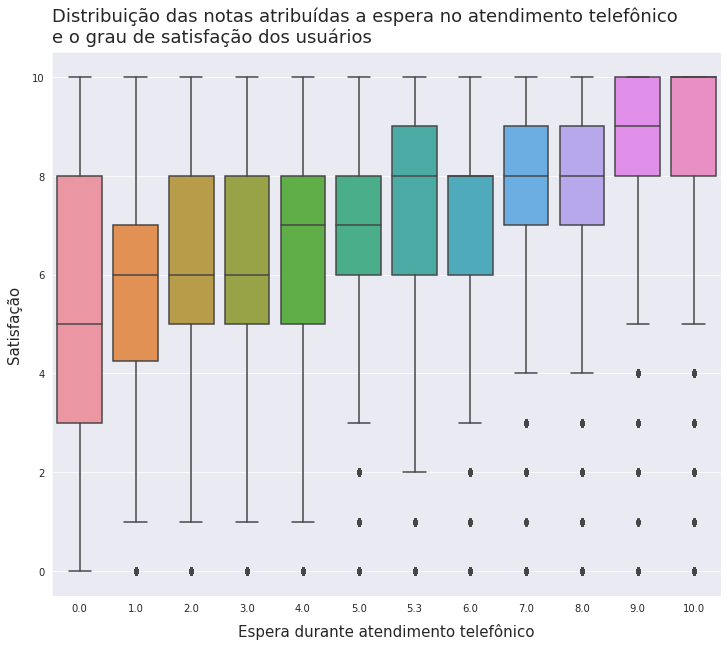

time: 485 ms (started: 2021-06-26 12:20:43 +00:00)


In [91]:
plt.figure(figsize=(12, 10))
ax = sns.boxplot(x='A2_1', y='J1', data=df)
set_graph_style(ax, 'Distribuição das notas atribuídas a espera no atendimento telefônico\ne o grau de satisfação dos usuários', 'Espera durante atendimento telefônico')

> A partir do gráfico demonstrado acima, é possível visualizar que quanto maior a nota atribuída a espera para falar com o atendente durante um atendimento telefônico, maior tendem a ser os valores atribuídos ao grau de satisfação.

> Abaixo também segue um grafico de linha, para visualizarmos a relação

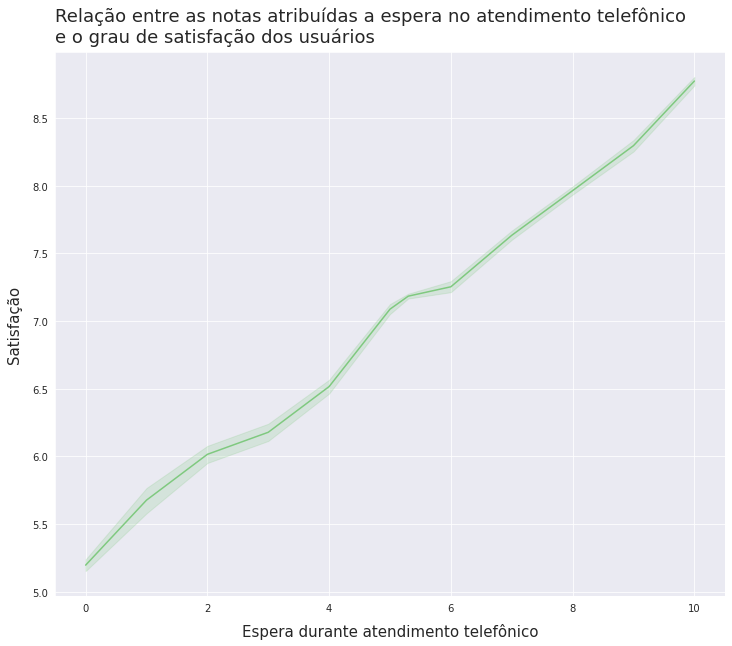

time: 2.5 s (started: 2021-06-26 12:09:27 +00:00)


In [51]:
plt.figure(figsize=(12, 10))
ax = sns.lineplot(x='A2_1', y='J1', data=df)
set_graph_style(ax, 'Relação entre as notas atribuídas a espera no atendimento telefônico\ne o grau de satisfação dos usuários', 'Espera durante atendimento telefônico')

### Nota atribuída a necessidade de repetir a demanda x grau de satisfação

> Formatando os valores em 1 casa decimal

In [52]:
df['A2_2'] = df['A2_2'].apply(format_float)

time: 141 ms (started: 2021-06-26 12:09:36 +00:00)


> Visualizando a distribuição entre os valores da necessidade de repetir a demanda e o grau de satisfação atribuído

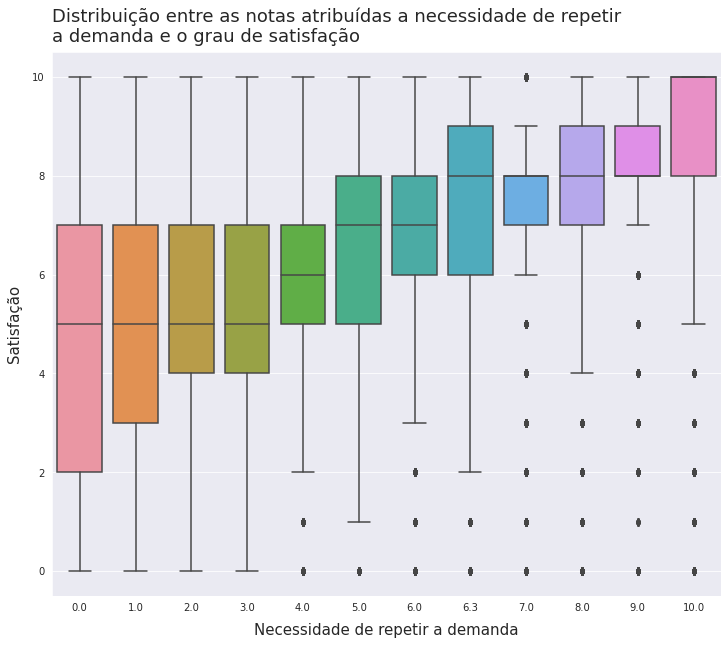

time: 532 ms (started: 2021-06-26 12:09:38 +00:00)


In [53]:
plt.figure(figsize=(12, 10))
ax = sns.boxplot(x='A2_2', y='J1', data=df)
set_graph_style(ax, 'Distribuição entre as notas atribuídas a necessidade de repetir\na demanda e o grau de satisfação', 'Necessidade de repetir a demanda')

> 

### Nota atribuída à capacidade de esclarecimento por parte dos atendentes x satisfação do cliente

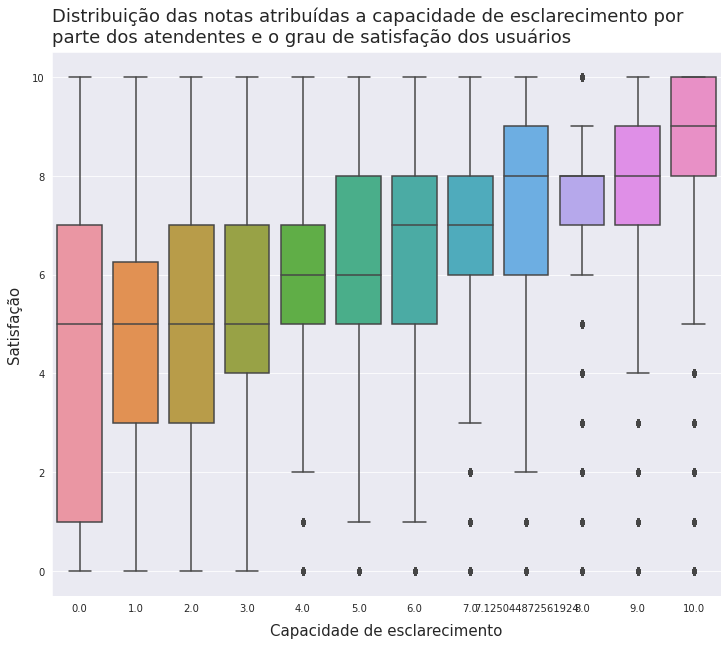

time: 495 ms (started: 2021-06-26 12:38:10 +00:00)


In [93]:
plt.figure(figsize=(12, 10))
ax = sns.boxplot(x='A2_3', y='J1', data=df)
set_graph_style(ax, 'Distribuição das notas atribuídas a capacidade de esclarecimento por\nparte dos atendentes e o grau de satisfação dos usuários', 'Capacidade de esclarecimento')

## Transformando dados em categorias para salvamento

In [56]:
#df['J1'].map()
df['J1'] = df['J1'].apply(lambda x: 1 if x > 7 else 0)

time: 80.3 ms (started: 2021-06-26 12:12:36 +00:00)


In [ ]:
df.to_csv('data-treated.csv')

time: 5.14 s (started: 2021-06-25 18:48:23 +00:00)


In [57]:
df

B1_2  B1_1  E1_2  C1_2  E1_1  ...        F4         A5        F5  G1_2  J1
0        7.0   7.0  10.0  10.0   8.0  ...  4.997266   7.813825  2.000000     0   0
1       10.0  10.0  10.0  10.0  10.0  ...  4.997266  10.000000  1.748448     0   1
2       10.0  10.0  10.0   8.0   8.0  ...  4.997266   7.813825  2.000000     0   1
3       10.0  10.0   0.0  10.0  10.0  ...  4.997266   7.813825  2.000000     0   1
4       10.0  10.0  10.0   0.0  10.0  ...  4.997266   7.813825  2.000000     0   1
...      ...   ...   ...   ...   ...  ...       ...        ...       ...   ...  ..
166694  10.0  10.0  10.0   8.0   8.0  ...  4.997266  10.000000  2.000000     1   1
166695  10.0  10.0  10.0  10.0  10.0  ...  4.997266   7.813825  1.748448     1   1
166696   8.0   8.0  10.0   6.0   8.0  ...  4.997266   7.813825  1.748448     1   0
166697   4.0   5.0   7.0   8.0   6.0  ...  4.997266   7.813825  2.000000     1   1
166698  10.0   9.0   8.0  10.0  10.0  ...  4.997266   7.813825  2.000000     1   1

[166441 rows x 21 columns]

time: 58.2 ms (started: 2021-06-26 12:12:37 +00:00)
